# Materials associated with the paper: 

Cao, W., Williams, S., Flament, N., Zahirovic, S., Scotese, C., and Müller, R. D., 2018. Paleolatitudinal distribution of lithologic indicators of climate in a paleogeographic framework. Geological Magazine, 1-24. doi:10.1017/S0016756818000110.

### This Jupyter notebook is used to generate Figures 1-4 for the paper.

The source code in this notebook is written in Python 2.7. It utilises the standard scientific Python modules including numpy, pandas, mpl_toolkits, matplotlib, os, and the open source module 'pygplates' which provides a Python API to the GPlates software (https://www.gplates.org/). Here, the source code has been modified to Python 3.7 by Behnam Sadeghi.

## Import Python modules

In [1]:
import pygplates 
import glob, os
os.environ['PROJ_LIB'] = r'C:\ProgramData\Anaconda3\pkgs\proj4-5.1.0-hfa6e2cd_1\Library\share'
from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd
from matplotlib import colors
from matplotlib import legend
from IPython.display import Image
%matplotlib inline

## Figure 1

### Read the input data

In [2]:
# input the lithologic data - PresentDay_LithData_Matthews2016_CEG_410-0Ma_ToAgeCorrected_CookCut_DeleteDataUsingStartAge
point_feature_filename_coals = '../Data/Lithologic_Data/Matthews2016_CEG_410.shp'
input_feature_collection_coals = pygplates.FeatureCollection(point_feature_filename_coals)

# read the rotation file
input_rotation_filename_Matthews2016PMAG_fixed = ['../Data/Tectonic_model/Global_EB_410-0Ma_GK07_Matthews_etal.rot']
rotation_model = pygplates.RotationModel(input_rotation_filename_Matthews2016PMAG_fixed)

# read contient polygons file
continental_polygons = pygplates.FeatureCollection('../Data/Tectonic_model/ContPolys/PresentDay_ContinentalPolygons_Matthews++.shp')


### Set the ages for the data 

In [3]:
# the ages of the data points
age_range_list = [(419,393),   # Early Devonian
           (393,388),   # Middle Devonian (Eifelian)
           (388,383),   # Middle Devonian (Givetian)
           (383,359),   # Late Devonian
           (359,331),   # Early Carboniferous (Tournaisian-Visean)
           (331,323),   # Early Carboniferous (Serpukhovian)
           (323,307),   # Late Carboniferous (Bashkirian-Moscovian)
           (307,299),   # Late Carboniferous (Kasimovian-Gzhelian)
           (299,290),   # Early Permian (Asselian-Sakmarian)
           (290,252),   # Middle-Late Permian (Artinskian-Lopingian)
           (252,247),   # Early Triassic
           (247,237),   # Middle Triassic
           (237,201),   # Late Triassic
           (201,164),   # Early and Middle Jurassic
           (164,145),   # Late Jurassic
           (145,113),   # Early Cretaceous (Berriasian-Aptian)
           (113,89.8),   # Late Cretaceous (Albian-Turonian)
           (89.8,66.0),   # Late Cretaceous (Coniacian-Maastrichtian)
           (66.0,56.0),   # Paleocene
           (56.0,47.8),  # Early Eocene (Ypresian?)
           (47.8,33.9),  # Middle and Late Eocene
           (33.9,23.0),  # Oligocene
           (23.0,5.3),    # Miocene
           (0.01,-0.01)]

i = 0
for i in np.arange(0,24,1):
    Age = np.mean(age_range_list[i])
    print (Age)

406.0
390.5
385.5
371.0
345.0
327.0
315.0
303.0
294.5
271.0
249.5
242.0
219.0
182.5
154.5
129.0
101.4
77.9
61.0
51.9
40.849999999999994
28.45
14.15
0.0


### Define the function for reconstructing the data points back in time

In [4]:
# define a function for reconstructing the data points back in time
def get_paleolithology(point_features,rotation_model):
    pX = []
    pY = []
    pAge = []
    LithCode=[]
    reconstructed_points = []
    for point in input_feature_collection_coals:
        lithcode = point.get_shapefile_attribute('LithCode')
        #if lithcode == 'C' and point.get_reconstruction_plate_id()!=0:
        #if lithcode == 'E' and point.get_reconstruction_plate_id()!=0:
        #if lithcode== 'T' or lithcode=='D' or lithcode=='G' and point.get_reconstruction_plate_id()!=0:
        BirthTime = np.median(point.get_valid_time())
        if BirthTime<410:
            pAge.append(BirthTime)
            point_rotation = rotation_model.get_rotation(BirthTime, point.get_reconstruction_plate_id(), anchor_plate_id=0) #obtain rotating rules
            reconstructed_point = point_rotation * point.get_geometry() # carry out reconstruction
            pX.append(reconstructed_point.to_lat_lon()[1])
            pY.append(reconstructed_point.to_lat_lon()[0])
            reconstructed_points.append(point)
            LithCode.append(point.get_shapefile_attribute('LithCode'))
    return pX,pY,pAge,LithCode

# reconstruct all data and get their x, y coordinates and ages
pX,pY,pAge,LithCode = get_paleolithology(input_feature_collection_coals,rotation_model)
data_xy = []
data_xy = zip(LithCode,pY,pX,pAge)
#print (data_xy)

### Make the figure

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


406.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


390.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


385.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


371.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


327.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


303.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


294.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


271.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


249.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


242.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


219.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


182.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


129.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


101.4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


77.9


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


61.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


51.9


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


40.849999999999994


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


28.45


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


14.15


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


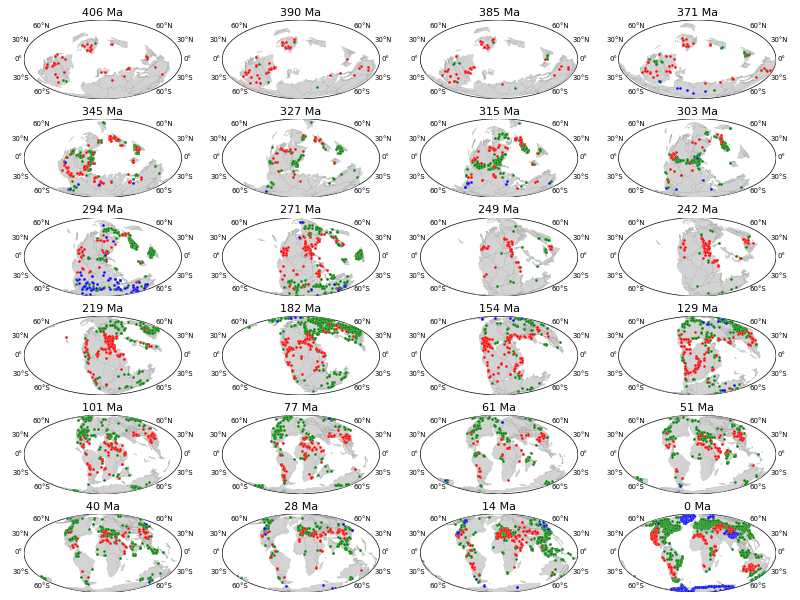

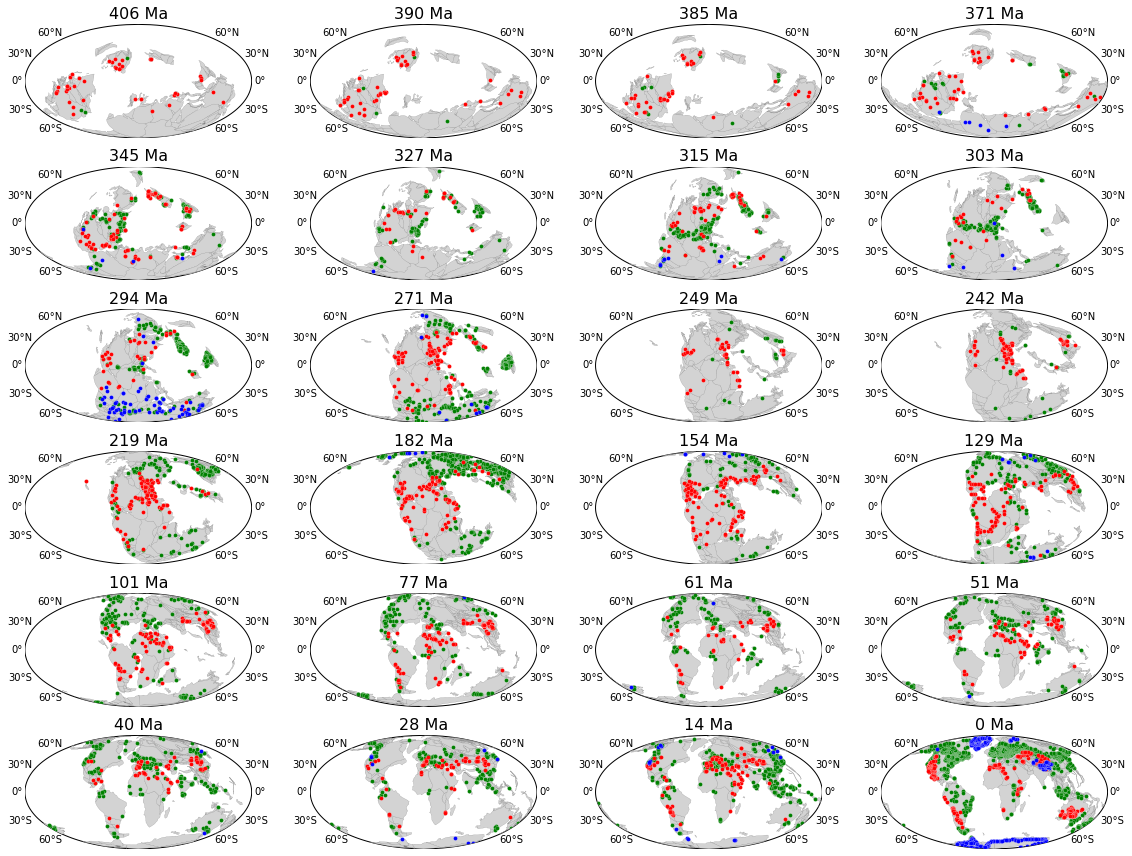

In [5]:
#from shapely.geometry import Polygon
fig, ax = plt.subplots(figsize=(16,12))

for i in np.arange(0,24,1):
    
    #fig, ax = plt.subplots(figsize=(6,4))
    ax = plt.subplot(6,4,i+1)
    
    # Reconstruct Continental Polygons
    age = np.mean(age_range_list[i])
    print (age)
    output_continent = 'temp.shp'
    pygplates.reconstruct(continental_polygons,rotation_model,output_continent,age,anchor_plate_id=0)    
    
    # plot continental polygons
    # resolution: c (crude), l (low), i (intermediate), h (high), f (full) or None
    m = Basemap(projection='moll',lat_0=0,lon_0=0,resolution='c', ax=ax)
    
    m.drawparallels(np.arange(-90,90,30),labels=[1,1,0,0],color='white', textcolor='black',linewidth=0.0)
    m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='white', textcolor='black',linewidth=0.0)
    
    shp_info = m.readshapefile('temp','shp',drawbounds=False,color='red')
    for nshape,seg in enumerate(m.shp):
        poly = Polygon(seg,facecolor='lightgrey',edgecolor='grey',linewidth=0.2)
        ax.add_patch(poly)
    
    # plot the lithologic data
    x,y = m(np.asarray(pX),np.asarray(pY))
    # Coals
    index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & (np.array(LithCode) == 'C'))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='green',markeredgecolor='white',markersize=4, markeredgewidth=0.2) #markeredgewidth=0.2
    # Evaporites
    index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & (np.array(LithCode) == 'E'))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='red',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    # Glacial
    index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & ((np.array(LithCode) == 'T') | (np.array(LithCode) == 'D') | (np.array(LithCode) == 'G')))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='blue',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    
    plt.title('%d Ma' % age, fontsize=16)

plt.tight_layout()
plt.savefig('Output/Fig_01.pdf' % age) # 1000
plt.savefig('Output/Fig_01.png' % age, dpi=50)
#plt.show()
os.system('rm *.dbf *.prj *.shx *.shp')

Image('Output/Fig_01.png')


## Figure 2

### Input the data and make the figure

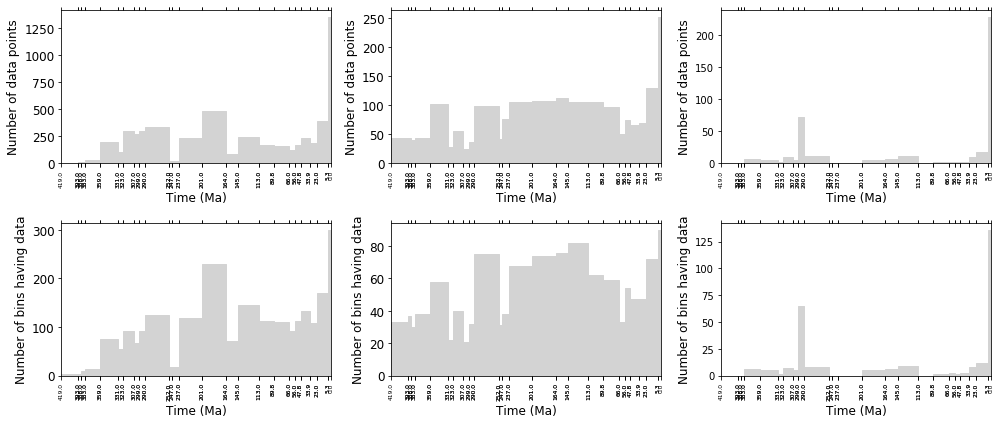

In [6]:
# read the data
Data = pd.read_excel('../Data/Fig02/Sum_LithData_Matthews2106_EachMap_410-0Ma.xlsx')
Data_bins = pd.read_excel('../Data/Fig02/Sum_Matthews2016_BinsHavingData_BinningSize5.xlsx')

# Plot the figure
fig ,axes = plt.subplots(nrows=2, ncols=3,figsize=(14,6),tight_layout=True) #tight_layout=True,sharex=True

bar_width = Data['Bar_Width']

##########################################
# coals
axes[0,0].bar(Data['MiddelAge'],Data['Sum_Coals'],bar_width,color='lightgrey',align='center',edgecolor='lightgrey') #,alpha=0.5

# set x axis
axes[0,0].set_xticks(np.hstack((Data['FromAge'],Data['ToAge']))) #, rotation=50,,verticalalignment='top'
axes[0,0].set_xlim((419,0))
axes[0,0].xaxis.set_tick_params(labelsize=6,direction='out')
plt.setp(axes[0,0].xaxis.get_majorticklabels(), rotation=90)
axes[0,0].set_xlabel('Time (Ma)',fontsize=12)
axes[0,0].xaxis.set_ticks_position('both')
# set y axis
axes[0,0].yaxis.set_tick_params(labelsize=12,direction='out')
axes[0,0].yaxis.set_ticks_position('left')
axes[0,0].set_ylabel('Number of data points',fontsize=12)

# sum of bins having data
axes[1,0].bar(Data_bins['MiddelAge'],Data_bins['Sum_Coals'],bar_width,color='lightgrey',align='center',edgecolor='lightgrey')
# set x axis
axes[1,0].set_xticks(np.hstack((Data['FromAge'],Data['ToAge']))) #, rotation=50,,verticalalignment='top'
axes[1,0].set_xlim((419,0))
axes[1,0].xaxis.set_tick_params(labelsize=6,direction='out')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=90)
axes[1,0].set_xlabel('Time (Ma)',fontsize=12)
axes[1,0].xaxis.set_ticks_position('both')
# set y axis
axes[1,0].yaxis.set_tick_params(labelsize=12,direction='out')
axes[1,0].yaxis.set_ticks_position('left')
axes[1,0].set_ylabel('Number of bins having data',fontsize=12)


##########################################
# Evaporites
axes[0,1].bar(Data['MiddelAge'],Data['Sum_Evaporites'], bar_width,color='lightgrey',align='center',edgecolor='lightgrey')
# set x axis
axes[0,1].set_xticks(np.hstack((Data['FromAge'],Data['ToAge']))) #, rotation=50,,verticalalignment='top'
axes[0,1].set_xlim((419,0))
axes[0,1].xaxis.set_tick_params(labelsize=6,direction='out')
plt.setp(axes[0,1].xaxis.get_majorticklabels(), rotation=90)
axes[0,1].set_xlabel('Time (Ma)',fontsize=12)
axes[0,1].xaxis.set_ticks_position('both')
# set y axis
axes[0,1].yaxis.set_tick_params(labelsize=12,direction='out')
axes[0,1].yaxis.set_ticks_position('left')
axes[0,1].set_ylabel('Number of data points',fontsize=12)

# sum of bins having data
axes[1,1].bar(Data_bins['MiddelAge'],Data_bins['Sum_Evaporites'],bar_width,color='lightgrey',align='center',edgecolor='lightgrey')
# set x axis
axes[1,1].set_xticks(np.hstack((Data['FromAge'],Data['ToAge']))) #, rotation=50,,verticalalignment='top'
axes[1,1].set_xlim((419,0))
axes[1,1].xaxis.set_tick_params(labelsize=6,direction='out')
plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=90)
axes[1,1].set_xlabel('Time (Ma)',fontsize=12)
axes[1,1].xaxis.set_ticks_position('both')
# set y axis
axes[1,1].yaxis.set_tick_params(labelsize=12,direction='out')
axes[1,1].yaxis.set_ticks_position('left')
axes[1,1].set_ylabel('Number of bins having data',fontsize=12)


##########################################
# Glacial
axes[0,2].bar(Data['MiddelAge'],Data['Sum_Glacial'], bar_width,color='lightgrey',align='center',edgecolor='lightgrey')

# set x axis
axes[0,2].set_xticks(np.hstack((Data['FromAge'],Data['ToAge']))) #, rotation=50,,verticalalignment='top'
axes[0,2].set_xlim((419,0))
axes[0,2].xaxis.set_tick_params(labelsize=6,direction='out')
plt.setp(axes[0,2].xaxis.get_majorticklabels(), rotation=90)
axes[0,2].set_xlabel('Time (Ma)',fontsize=12)
axes[0,2].xaxis.set_ticks_position('both')
# set y axis
axes[0,2].yaxis.set_tick_params(labelsize=10,direction='out')
axes[0,2].yaxis.set_ticks_position('left')
axes[0,2].set_ylabel('Number of data points',fontsize=12)

# sum of bins having data
axes[1,2].bar(Data_bins['MiddelAge'],Data_bins['Sum_Glacial'],bar_width,color='lightgrey',align='center',edgecolor='lightgrey')
# set x axis
axes[1,2].set_xticks(np.hstack((Data['FromAge'],Data['ToAge']))) #, rotation=50,,verticalalignment='top'
axes[1,2].set_xlim((419,0))
axes[1,2].xaxis.set_tick_params(labelsize=6,direction='out')
plt.setp(axes[1,2].xaxis.get_majorticklabels(), rotation=90)
axes[1,2].set_xlabel('Time (Ma)',fontsize=12)
axes[1,2].xaxis.set_ticks_position('both')

# set y axis
axes[1,2].set_ylabel('Number of bins having data',fontsize=12)
axes[1,2].yaxis.set_tick_params(labelsize=10,direction='out')
axes[1,2].yaxis.set_ticks_position('left')

#fig.subplots_adjust(hspace=0.2)
plt.savefig('Output/Fig_02.pdf')
plt.show()

## Figure 3

### Define the function

In [7]:
def get_paleolithology(point_features,rotation_model):
    pX = []
    pY = []
    pAge = []
    for point in point_features:
        lithcode = point.get_shapefile_attribute('LithCode')
        if lithcode == 'C' and point.get_reconstruction_plate_id()!=0:
        #if lithcode == 'E' and point.get_reconstruction_plate_id()!=0:
        #if lithcode== 'T' or lithcode=='D' or lithcode=='G' and point.get_reconstruction_plate_id()!=0:
            BirthTime = np.median(point.get_valid_time())
            if BirthTime<410:
                pAge.append(BirthTime)
                point_rotation = rotation_model.get_rotation(BirthTime, point.get_reconstruction_plate_id(), anchor_plate_id=0) #obtain rotating rules
                reconstructed_point = point_rotation * point.get_geometry() # carry out reconstruction
                pX.append(reconstructed_point.to_lat_lon()[1])
                pY.append(reconstructed_point.to_lat_lon()[0])         
    return pX,pY,pAge

### Data processing for removing the sampling bias

In [8]:
# remove the sampling bias
result_original = []
result_SamplingBiasRemoved = []
result_flipped = []
result_doubled = []

for i in np.arange(0,24,1):
    
    result = []
    result_0 = []
    result_1 = []
    result_2 = []
    result_3 = []
    
    index = np.where(np.array(pAge) == np.mean(age_range_list[i]))
    #print np.mean(age_range_list[i]),np.array(pAge)[index]
    
    xedges = np.arange(-180, 181, 5) #180, longtitude
    yedges = np.arange(-90, 91, 5) #90, latitude, specify the bin size
    data_hist = np.histogram2d(np.array(pX)[index],np.array(pY)[index], bins=(xedges, yedges))
    result_0 = np.nansum(data_hist[0], axis=0)
    result_original.append(result_0)
    #print type(result_original)
    
    # remove the sampling bias
    result_1 = np.nansum(data_hist[0]/data_hist[0], axis=0)
    result_SamplingBiasRemoved.append(result_1)
    
    #plt.pcolor(xedges,yedges,data_hist[0].T) #T means reverse the x, y axis
    
    # flip the data
    result_2 = np.flipud(result_1[:18])+result_1[18:]
    result_flipped.append(result_2) # add data on south hemisphere to north hemishpere
    #print result_flipped
    
    # double the data
    result_3 = list(np.flipud(result_2)) + list(result_2) 
    result_doubled.append(np.array(result_3)) # add data on south hemisphere to north hemishpere
    #print result_doubled

print (xedges)
print (yedges)

[-180 -175 -170 -165 -160 -155 -150 -145 -140 -135 -130 -125 -120 -115
 -110 -105 -100  -95  -90  -85  -80  -75  -70  -65  -60  -55  -50  -45
  -40  -35  -30  -25  -20  -15  -10   -5    0    5   10   15   20   25
   30   35   40   45   50   55   60   65   70   75   80   85   90   95
  100  105  110  115  120  125  130  135  140  145  150  155  160  165
  170  175  180]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


### Make the figure

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(37, 73)
(37, 73)
(73,)
(37,)
(36, 72)
24.0


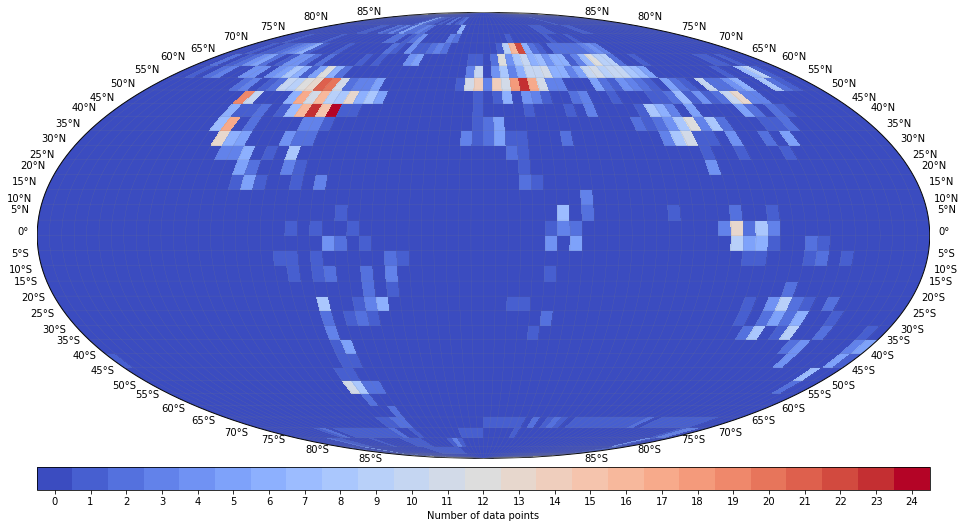

In [9]:

fig = plt.figure(figsize=(16,14))

m = Basemap(projection='moll',lat_0=0,lon_0=0,resolution='c',suppress_ticks=True)

xedges = np.arange(-180,181,5)
yedges = np.arange(-90,91,5)

px,py = np.meshgrid(xedges,yedges)
print (py.shape)
print (px.shape)

# pcolor or pcolormesh (they are same)
data = data_hist[0].T
cmap =plt.get_cmap('coolwarm', np.max(data)-np.min(data)+1) #binary, coolwarm, bwr
m.pcolormesh(px,py,data,latlon=True,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5) #T means reverse the x, y axis

# pcolor or pcolormesh on a basemap
#x,y = m(np.asarray(xedges),np.asarray(yedges))
print (xedges.shape) # longitude
print (yedges.shape) # latitude
print (data_hist[0].T.shape)

#x,y = m(xedges,yedges)
#m.pcolormesh(lon,lat,data_hist[0].T, latlon=True)


m.drawparallels(np.arange(-90, 91., 5.), labels=[1, 1, 0, 0],
                dashes=[1, 1], linewidth=0.25, color='0.5')
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 1, 1],
                dashes=[1, 1], linewidth=0.25, color='0.5')

print (np.min(data))
print (np.max(data))
cb = m.colorbar(location='bottom', label="Number of data points",ticks=np.arange(np.min(data),np.max(data)+1))

#plt.savefig('Fig2b.png',dpi=1000)
plt.savefig('Output/Fig_03b.pdf',dpi=600)
plt.show()

## Figure 3c

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


nan


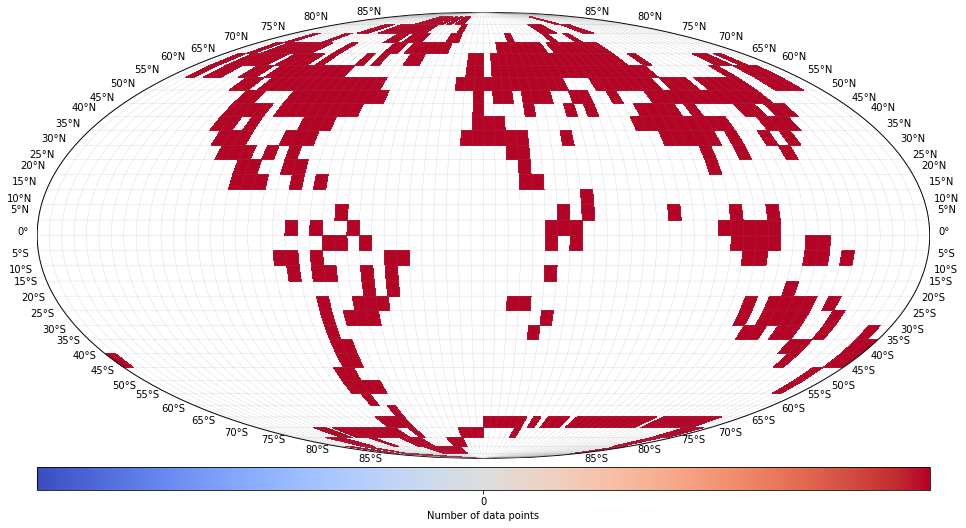

In [10]:
fig = plt.figure(figsize=(16,14))

m = Basemap(projection='moll',lat_0=0,lon_0=0,resolution='c',suppress_ticks=True)

data = (data_hist[0]/data_hist[0]).T
cmap =plt.get_cmap('coolwarm') # jet, coolwarm, bwr
m.pcolormesh(px,py,data,latlon=True,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5) #T means reverse the x, y axis

m.drawparallels(np.arange(-90, 91., 5.), labels=[1, 1, 0, 0],
                dashes=[1, 1], linewidth=0.25, color='0.5')
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 1, 1],
                dashes=[1, 1], linewidth=0.25, color='0.5')

print (np.min(data))
print (np.max(data))
cb = m.colorbar(location='bottom', label="Number of data points")
cb.set_ticks([0,1])

plt.savefig('Output/Fig_03c.pdf')
plt.show()


In [11]:
os.system('rm Output/*.png')

1